In [17]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [18]:
# with pandas 2.0, one could use date_format='%Y-%m-%d %H:%M:%S%z', but that's not yet available on Arch Linux
solar_ts=pd.read_csv("data/energy_charts.csv", sep=",", header=0)#date_format='%Y-%m-%d %H:%M:%S%z')#parse_dates={"date": ["Datum"]})

In [19]:
print(solar_ts['Datum'])

0         2015-01-01T00:00+01:00
1         2015-01-01T00:15+01:00
2         2015-01-01T00:30+01:00
3         2015-01-01T00:45+01:00
4         2015-01-01T01:00+01:00
                   ...          
327589    2024-05-05T10:15+02:00
327590    2024-05-05T10:30+02:00
327591    2024-05-05T10:45+02:00
327592    2024-05-05T11:00+02:00
327593    2024-05-05T11:15+02:00
Name: Datum, Length: 327594, dtype: object


<Axes: xlabel='Datum'>

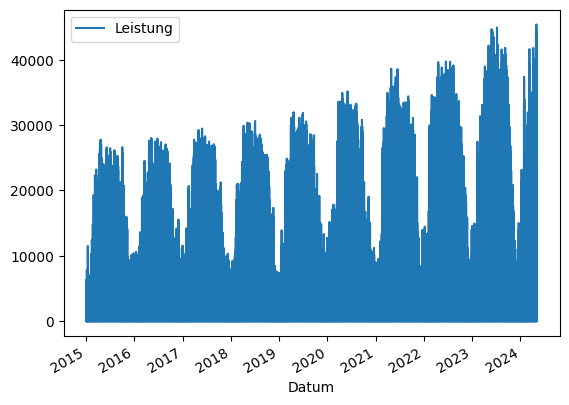

In [20]:
solar_ts['Datum']=pd.to_datetime(solar_ts['Datum'], format='%Y-%m-%dT%H:%M%z', utc=True)
solar_ts=solar_ts.set_index(keys="Datum",drop=True)
solar_ts.plot()

In [21]:
adfresult = adfuller(solar_ts[2:30000])
print(adfresult[0])
print(adfresult[1])

-22.4459509440449
0.0


<Axes: xlabel='Datum'>

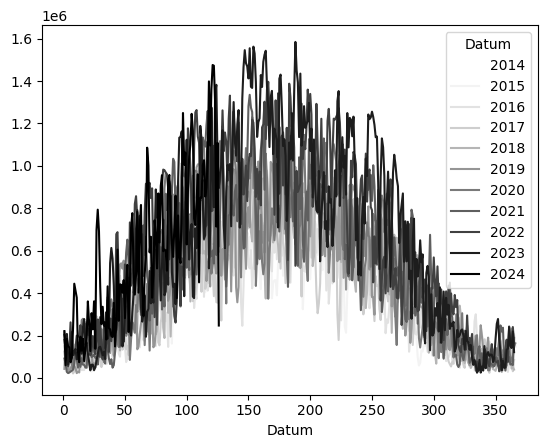

In [22]:
# see https://stackoverflow.com/questions/30379789/plot-pandas-data-frame-with-year-over-year-data
pv = pd.pivot_table(solar_ts, index=solar_ts.index.dayofyear, columns=solar_ts.index.year,
                    values='Leistung', aggfunc='sum')
pv.plot(cmap="Grays")

<Axes: xlabel='Datum'>

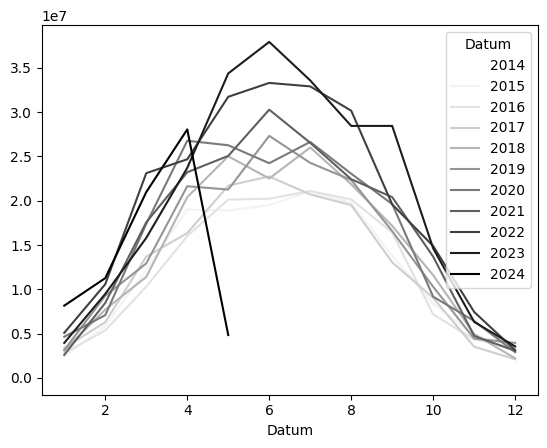

In [23]:
# see https://stackoverflow.com/questions/30379789/plot-pandas-data-frame-with-year-over-year-data
pv = pd.pivot_table(solar_ts, index=solar_ts.index.month, columns=solar_ts.index.year,
                    values='Leistung', aggfunc='sum')
pv.plot(cmap="Grays")

In [24]:
# An example of a gap in the data
# TODO: Also, there is duplicate data here that pandas duplicated-function will not find...?
solar_ts.index[5660:5680]

DatetimeIndex(['2015-02-28 22:00:00+00:00', '2015-02-28 22:15:00+00:00',
               '2015-02-28 22:30:00+00:00', '2015-02-28 22:45:00+00:00',
               '2015-03-01 00:00:00+00:00', '2015-03-01 00:15:00+00:00',
               '2015-03-01 00:30:00+00:00', '2015-03-01 00:45:00+00:00',
               '2015-03-01 00:00:00+00:00', '2015-03-01 00:15:00+00:00',
               '2015-03-01 00:30:00+00:00', '2015-03-01 00:45:00+00:00',
               '2015-03-01 01:00:00+00:00', '2015-03-01 01:15:00+00:00',
               '2015-03-01 01:30:00+00:00', '2015-03-01 01:45:00+00:00',
               '2015-03-01 02:00:00+00:00', '2015-03-01 02:15:00+00:00',
               '2015-03-01 02:30:00+00:00', '2015-03-01 02:45:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Datum', freq=None)

In [25]:
pd.Series(solar_ts.index.duplicated()).value_counts()

False    327522
True         72
Name: count, dtype: int64

In [26]:
(pd.Series(solar_ts.index[5660:5680]).diff())

0                  NaT
1      0 days 00:15:00
2      0 days 00:15:00
3      0 days 00:15:00
4      0 days 01:15:00
5      0 days 00:15:00
6      0 days 00:15:00
7      0 days 00:15:00
8    -1 days +23:15:00
9      0 days 00:15:00
10     0 days 00:15:00
11     0 days 00:15:00
12     0 days 00:15:00
13     0 days 00:15:00
14     0 days 00:15:00
15     0 days 00:15:00
16     0 days 00:15:00
17     0 days 00:15:00
18     0 days 00:15:00
19     0 days 00:15:00
Name: Datum, dtype: timedelta64[ns]

In [27]:
# Those values need imputation!
pd.date_range(solar_ts.index.min(), solar_ts.index.max(), freq='15Min').difference(solar_ts.index)

DatetimeIndex(['2015-02-28 23:00:00+00:00', '2015-02-28 23:15:00+00:00',
               '2015-02-28 23:30:00+00:00', '2015-02-28 23:45:00+00:00',
               '2015-09-25 02:00:00+00:00', '2015-09-25 02:15:00+00:00',
               '2015-09-25 02:30:00+00:00', '2015-09-25 02:45:00+00:00',
               '2016-02-27 02:00:00+00:00', '2016-02-27 02:15:00+00:00',
               '2016-02-27 02:30:00+00:00', '2016-02-27 02:45:00+00:00',
               '2016-09-30 02:00:00+00:00', '2016-09-30 02:15:00+00:00',
               '2016-09-30 02:30:00+00:00', '2016-09-30 02:45:00+00:00',
               '2017-02-26 02:00:00+00:00', '2017-02-26 02:15:00+00:00',
               '2017-02-26 02:30:00+00:00', '2017-02-26 02:45:00+00:00',
               '2017-09-29 02:00:00+00:00', '2017-09-29 02:15:00+00:00',
               '2017-09-29 02:30:00+00:00', '2017-09-29 02:45:00+00:00',
               '2018-02-25 02:00:00+00:00', '2018-02-25 02:15:00+00:00',
               '2018-02-25 02:30:00+00:00', '2018-0

In [28]:
# This add NaN as value for the missing indices, we can impute this later.
solar_ts = solar_ts.resample("15Min").first()
# As only a few values need imputation, so the choice of the imputation algorithm does not matter much.
solar_ts = solar_ts.interpolate(method="time")
# Only now can we infer a frequency.
solar_ts=solar_ts.asfreq(pd.infer_freq(solar_ts.index))

In [29]:
# There are no duplicated dates, good!
# (Although, a bit questionable, see above)
np.count_nonzero(solar_ts.index.duplicated())

0

In [30]:
solar_ts=solar_ts.asfreq(pd.infer_freq(solar_ts.index))

<Axes: xlabel='Datum'>

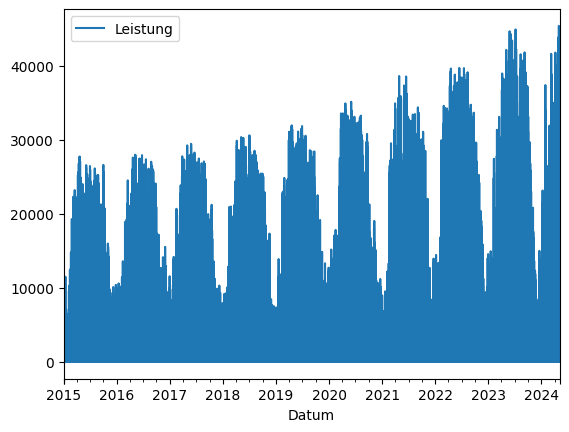

In [31]:
solar_ts.plot()

In [32]:
solar_ts_series = solar_ts.Leistung

<Axes: xlabel='Datum'>

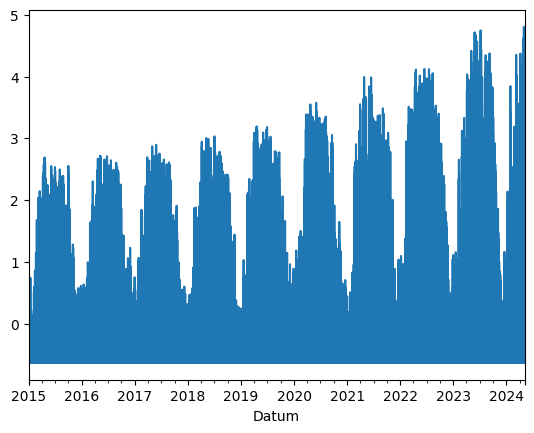

In [33]:
# Normalize
avg, dev = solar_ts_series.mean(), solar_ts_series.std()
solar_ts_series = (solar_ts_series - avg)/dev
solar_ts_series.plot()

<Axes: xlabel='Datum'>

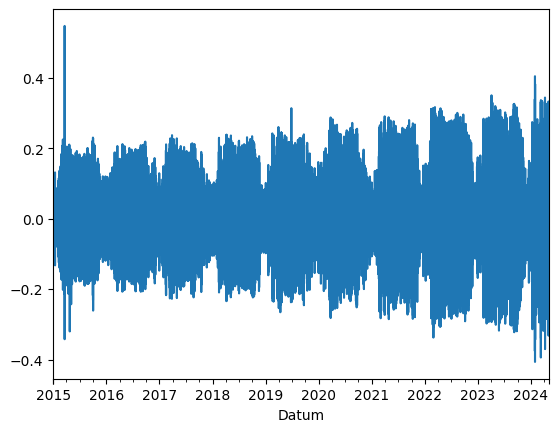

In [34]:
# Remove trend (TODO: compare with the approach in the Fourier series video, where they also detrend?)
solar_ts_series = solar_ts_series.diff().dropna()
solar_ts_series.plot()

In [35]:
# Consider taking another difference: solar_ts_series = solar_ts_series.diff().dropna()
# solar_ts_series.plot()

In [36]:
# remove increasing volatility - or (TODO: use a (G)ARCH here).
annual_volatility = solar_ts_series.groupby(solar_ts_series.index.year).std()
annual_vol_per_day = solar_ts_series.index.map(lambda d: annual_volatility.loc[d.year])
solar_ts_series_corrected_variance = solar_ts_series/annual_vol_per_day

In [37]:
annual_volatility

Datum
2014    0.000000
2015    0.059382
2016    0.058232
2017    0.060318
2018    0.068400
2019    0.070074
2020    0.076130
2021    0.078294
2022    0.092524
2023    0.094256
2024    0.096496
Name: Leistung, dtype: float64

In [38]:
annual_vol_per_day

Index([                 0.0,                  0.0,                  0.0,
       0.059382013550229464, 0.059382013550229464, 0.059382013550229464,
       0.059382013550229464, 0.059382013550229464, 0.059382013550229464,
       0.059382013550229464,
       ...
        0.09649560072446868,  0.09649560072446868,  0.09649560072446868,
        0.09649560072446868,  0.09649560072446868,  0.09649560072446868,
        0.09649560072446868,  0.09649560072446868,  0.09649560072446868,
        0.09649560072446868],
      dtype='float64', name='Datum', length=327593)

<Axes: xlabel='Datum'>

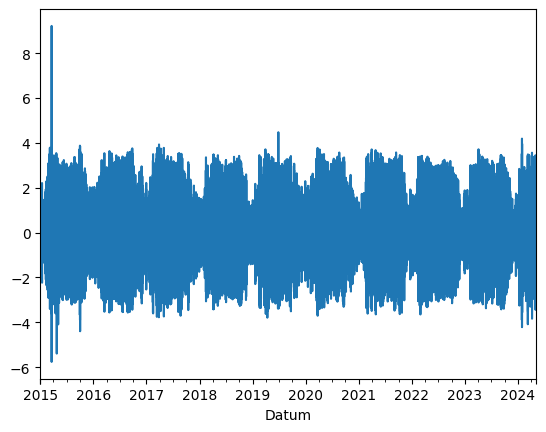

In [39]:
solar_ts_series_corrected_variance.plot()

In [40]:
# ritvik takes monthly means here
# why not take dayofyear?
monthly_mean = solar_ts_series_corrected_variance.groupby(solar_ts_series_corrected_variance.index.month).mean()
monthly_mean_per_day = solar_ts_series_corrected_variance.index.map(lambda d: monthly_mean.loc[d.month])

In [41]:
solar_ts_series_corrected_variance= solar_ts_series_corrected_variance - monthly_mean_per_day

<Axes: xlabel='Datum'>

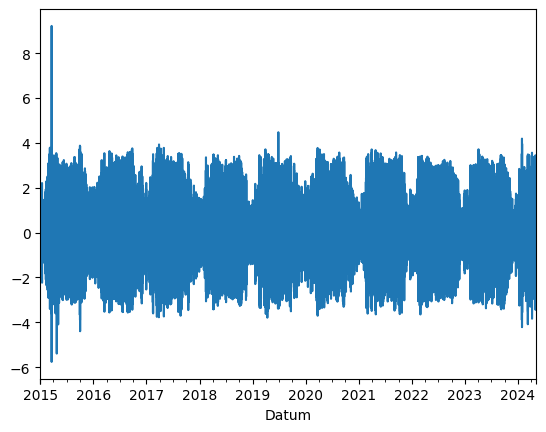

In [42]:
solar_ts_series_corrected_variance.plot()

In [43]:
# we only take the first few samples as my RAM explodes otherwise
adfresult = adfuller(solar_ts_series_corrected_variance[3:30000])
print(adfresult[0])
print(adfresult[1])
adfresult = adfuller(solar_ts_series_corrected_variance[120000:150000])
print(adfresult[0])
print(adfresult[1])

-45.67468183971968
0.0
-43.56622851187169
0.0


# Naive Model and Backtesting

In [44]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [45]:
# Data Preparation for Naive Model
ts = solar_ts_series_corrected_variance
ts = ts.dropna()

In [46]:
# Moving average model
def moving_average(data: pd.DataFrame, window_size: int=4*3, shift_size: int=96):
    moving_avg = data.rolling(window=window_size).mean()
    shifted_moving_avg = moving_avg.shift(shift_size)
    return(shifted_moving_avg)

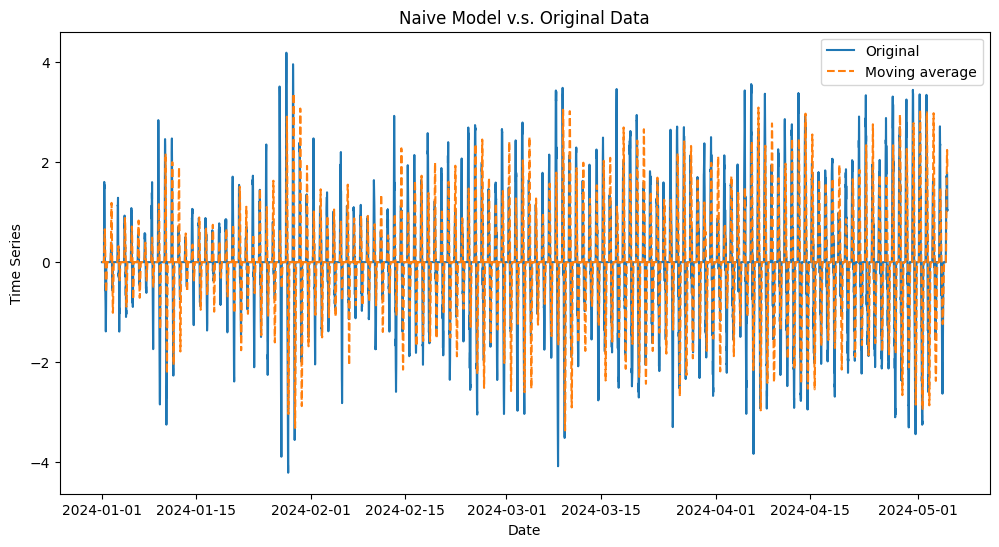

In [59]:
# Plot Naive Model
naive_model = moving_average(ts)

test_date_start = '2024-01-01 00:00+00:00'
test_ts = ts[test_date_start:]
naive_model_print = naive_model[test_date_start:]

plt.figure(figsize=(12, 6))
plt.plot(test_ts.index, test_ts, label='Original')
plt.plot(naive_model_print.index, naive_model_print, label='Moving average', linestyle='--')
plt.legend()
plt.title('Naive Model v.s. Original Data')
plt.xlabel('Date')
plt.ylabel('Time Series')
plt.show()

In [48]:
class TimeSeriesPredictionModel():
    """
    Time series prediction model implementation
    
    Parameters
    ----------
        model_name : class
            Choice of regressor
        model_params : dict
            Definition of model specific tuning parameters
    
    Functions
    ----------
        train : Train chosen model
        forcast : Apply trained model to prediction period and generate forecast DataFrame
    """
    def __init__(self, model_name, 
                 model_params: dict) -> None:
        """Initialize a new instance of time_series_prediction_model."""
        self.model = model_name(**model_params) 
    
    def train(self, X_train: pd.DataFrame, y_train: pd.Series) -> None:
        """Train chosen model."""
        self.X_train = X_train
        self.y_train = y_train
        self.model.fit(self.X_train, self.y_train)
    
    def forecast(self, X_test: pd.DataFrame) -> pd.DataFrame:
        """Apply trained model to prediction period and generate forecast DataFrame."""
        self.X_test = X_test
        forecast_df = pd.DataFrame(self.model.predict(self.X_test), index=self.X_test.index)
        forecast_df.index.name = 'Datum'
        return forecast_df

In [49]:
# Dummy data preparation for TimeSeriesPredictionModel

data = pd.DataFrame(index=ts.index, columns=['25h_lag', '24h_lag', 'Original'])
data['Original'] = ts
data['24h_lag'] = ts.shift(96)
data['25h_lag'] = ts.shift(100)

data

,25h_lag,24h_lag,Original
Datum,,,
2015-01-01 00:00:00+00:00,NaN,NaN,-2.138057e-19
2015-01-01 00:15:00+00:00,NaN,NaN,-2.138057e-19
2015-01-01 00:30:00+00:00,NaN,NaN,-2.138057e-19
2015-01-01 00:45:00+00:00,NaN,NaN,-2.138057e-19
2015-01-01 01:00:00+00:00,NaN,NaN,-2.138057e-19
...,...,...,...
2024-05-05 08:15:00+00:00,2.334570,1.827979,1.687818e+00
2024-05-05 08:30:00+00:00,2.364019,1.568905,1.609537e+00
2024-05-05 08:45:00+00:00,2.063071,1.176257,1.243852e+00


In [50]:
test_date_start = '2024-01-01 00:00+00:00'

In [51]:
# Dummy Data train-test split
train_df = data[:test_date_start]
train_df = train_df.drop(train_df.tail(1).index)
X_train = train_df[['25h_lag', '24h_lag']]
y_train = train_df[['Original']]

test_df = data[test_date_start:]
X_test = test_df[['25h_lag', '24h_lag']]
y_test = test_df[['Original']]

In [52]:
# Backtesting mit Sliding Window

def backtesting(X_train: pd.DataFrame, y_train: pd.DataFrame,
                X_test: pd.DataFrame, y_test: pd.DataFrame,
                model: TimeSeriesPredictionModel, prediction_step_size: int=96):

    # initializing output df
    predictions = pd.DataFrame(index=y_test.index, columns=['Original', 'Predictions'])
    predictions['Original'] = y_test

    for i in range(0, len(X_test)-prediction_step_size, prediction_step_size):
        end_idx = i + prediction_step_size
        forecast_index= X_test.iloc[i:end_idx].index
        
        # fit model and predict
        model.train(X_train, y_train)
        forecast = model.forecast(X_test.iloc[i:end_idx])
        predictions.loc[forecast_index, 'Predictions'] = forecast.to_numpy()
    
        print(f'Finished Forecast for {forecast_index[-1].date()}')

        # delete old time window from train data
        X_train = X_train.drop(X_train.head(prediction_step_size).index)
        y_train = y_train.drop(y_train.head(prediction_step_size).index)

        # add next time window to train data
        X_train = pd.concat([X_train, X_test.iloc[i:end_idx]])
        y_train = pd.concat([y_train, y_test.iloc[i:end_idx]])

    return predictions

In [53]:
# Initializing random forest regressor as instance of TimeSeriesPredictionModel
rdnf = TimeSeriesPredictionModel(RandomForestRegressor, {'n_estimators': 10, 'criterion': 'squared_error', 'max_depth': 5})

In [54]:
rdnf_pred = backtesting(X_train, y_train, X_test, y_test, rdnf)

c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-01


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-02


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-03


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-04


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-05


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-06


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-07


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-08


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-09


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-10


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-11


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-12


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-13


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-14


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-15


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-16


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-17


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-18


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-19


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-20


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-21


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-22


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-23


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-24


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-25


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-26


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-27


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-28


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-29


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-30


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-01-31


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-01


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-02


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-03


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-04


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-05


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-06


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-07


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-08


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-09


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-10


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-11


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-12


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-13


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-14


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-15


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-16


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-17


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-18


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-19


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-20


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-21


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-22


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-23


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-24


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-25


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-26


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-27


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-28


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-02-29


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-01


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-02


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-03


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-04


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-05


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-06


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-07


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-08


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-09


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-10


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-11


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-12


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-13


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-14


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-15


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-16


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-17


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-18


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-19


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-20


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-21


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-22


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-23


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-24


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-25


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-26


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-27


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-28


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-29


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-30


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-03-31


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-01


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-02


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-03


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-04


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-05


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-06


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-07


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-08


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-09


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-10


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-11


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-12


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-13


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-14


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-15


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-16


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-17


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-18


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-19


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-20


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-21


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-22


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-23


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-24


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-25


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-26


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-27


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-28


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-29


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-04-30


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-05-01


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-05-02


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-05-03


c:\Users\Andi L14y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished Forecast for 2024-05-04


<Axes: xlabel='Datum'>

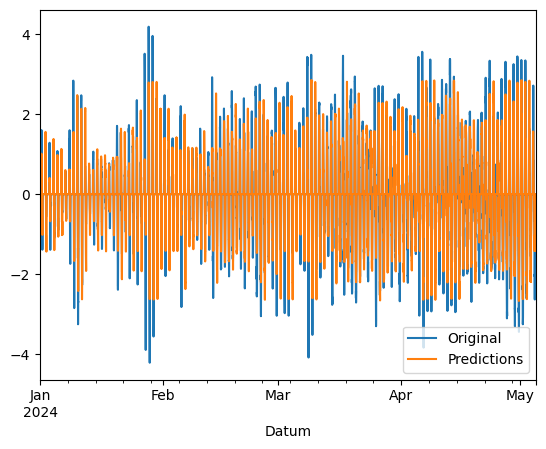

In [55]:
rdnf_pred = rdnf_pred.dropna() # ausgehend vom ersten Testzeitraum werden nur vollständige Test-Perioden predicted
rdnf_pred.plot()

In [56]:
# Metrics

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

def evaluation(y_true, y_pred):
    
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return mae, mape, mse, r2

In [58]:
mae, mape, mse, r2 = evaluation(rdnf_pred['Original'], rdnf_pred['Predictions'])

print(f'Model: Random Forest \n Mean absolute error: {mae}\n Mean absolute percentage error: {mape} \n Mean squared error: {mse} \n r2_score: {r2}')

Model: Random Forest 
 Mean absolute error: 0.23664326929772317
 Mean absolute percentage error: 6875006129120.795 
 Mean squared error: 0.19203360519063611 
 r2_score: 0.8079033217108302


In [ ]:
mae, mape, mse, r2 = evaluation(test_ts, naive_model_print)

print(f'Model: Naive Moving Average \n Mean absolute error: {mae}\n Mean absolute percentage error: {mape} \n Mean squared error: {mse} \n r2_score: {r2}')

Model: Naive Moving Average 
 Mean absolute error: 0.45535362903684434
 Mean absolute percentage error: 136923087712545.73 
 Mean squared error: 0.5412761201395926 
 r2_score: 0.4586762420380337
